In [1]:
# importing of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [72]:
# Read in data
df = pd.read_excel(r"C:\Users\ABC\Pictures\DataSets\LabeledText.xlsx")
print(df.shape)

(4869, 3)


In [63]:
df.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


# EDA

In [73]:
# text preprocessing or cleaning
import re
df['Caption'] = df['Caption'].str.lower()
df['Caption'] = df['Caption'].str.replace("\d", "", regex=True)
df['Caption'] = df['Caption'].str.replace("\W", " ", regex=True)
df['Caption'] = df['Caption'].str.replace("\s+", " ", regex=True)

# removes short words
df['Caption'] = df['Caption'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

# spelling correction
from textblob import TextBlob
combined_text = df['Caption'].str.cat(sep=' ')
#textBlb = TextBlob(combined_text)
#textBlb.correct().string

In [5]:
df.head()

,File Name,Caption,LABEL
0,1.txt,how i feel today legday jelly aching gym,negative
1,10.txt,arrivatw absolute disgrace two carriages from...,negative
2,100.txt,this is my valentine s from of my nephews i am...,positive
3,1000.txt,betterfeelingfilms rt via instagram first day ...,neutral
4,1001.txt,zoe s first love rattled johnnyharper,positive


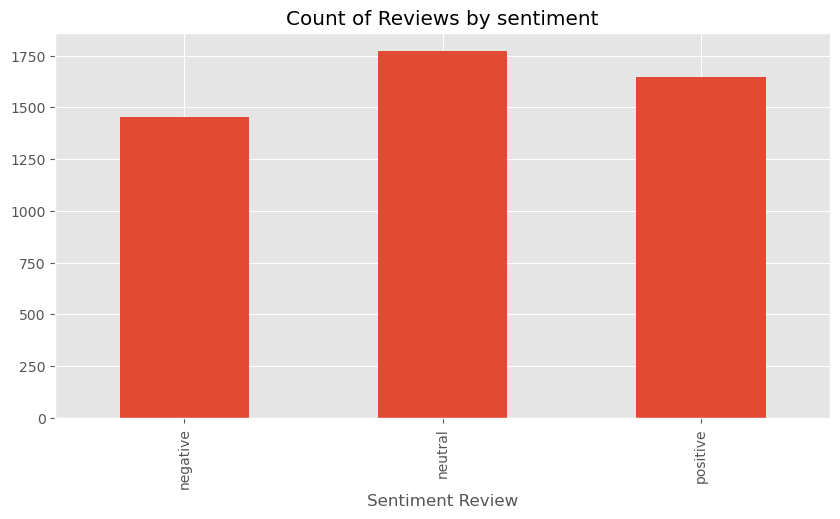

In [6]:
# visulization
ax = df['LABEL'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by sentiment',
          figsize=(10, 5))
ax.set_xlabel('Sentiment Review')
plt.show()

# spliting of the words
tokenized_words = df['Caption'].apply(lambda x: x.split())
tokenized_words.head()

for i in range(len(tokenized_words)):
    tokenized_words[i] = " ".join(tokenized_words[i])
df['Caption'] = tokenized_words
df.head()

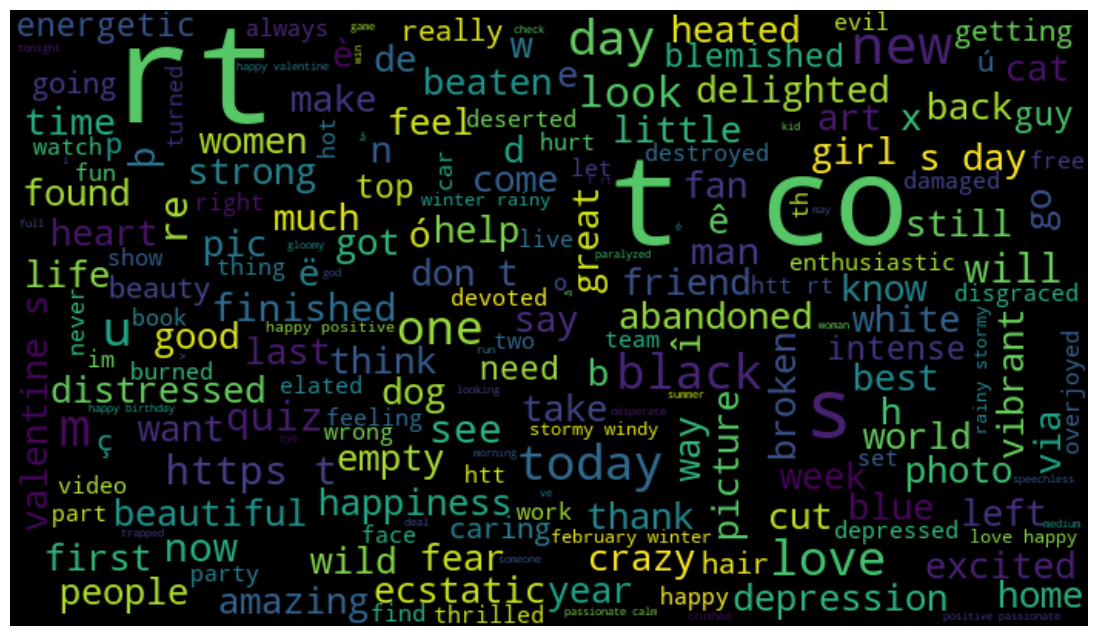

In [7]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df["Caption"]])

%matplotlib inline
from wordcloud import WordCloud
wordcloud = WordCloud(width=700, height=400, random_state=42, max_font_size=90).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

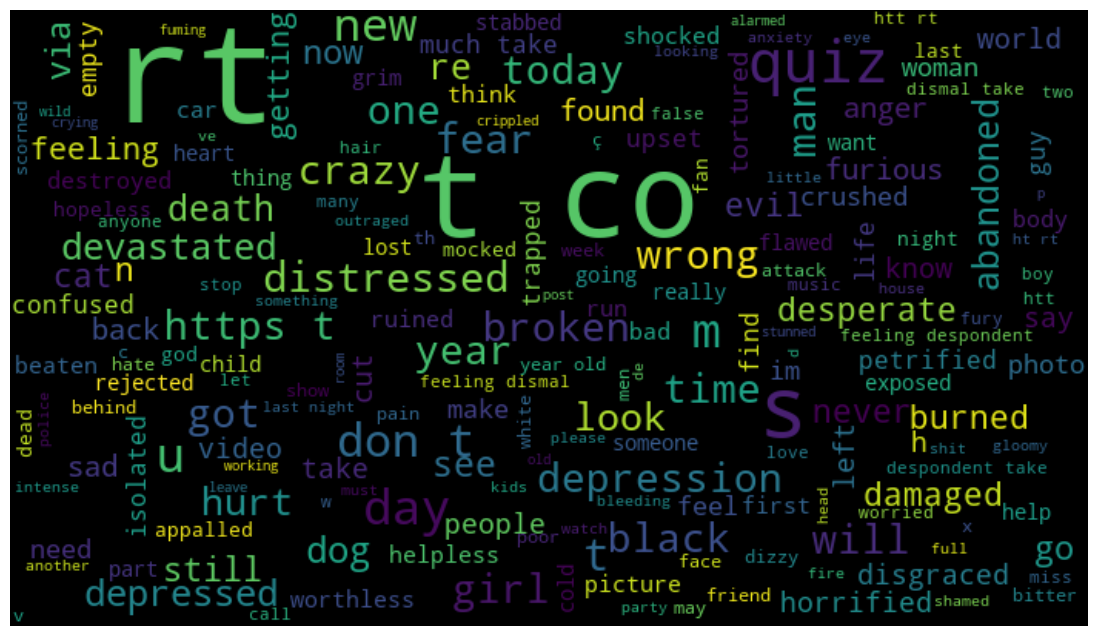

In [10]:
# visualize the frequent negative words
all_words = " ".join([sentence for sentence in df["Caption"][df['LABEL']=='negative']])

wordcloud = WordCloud(width=700, height=400, random_state=42, max_font_size=90).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

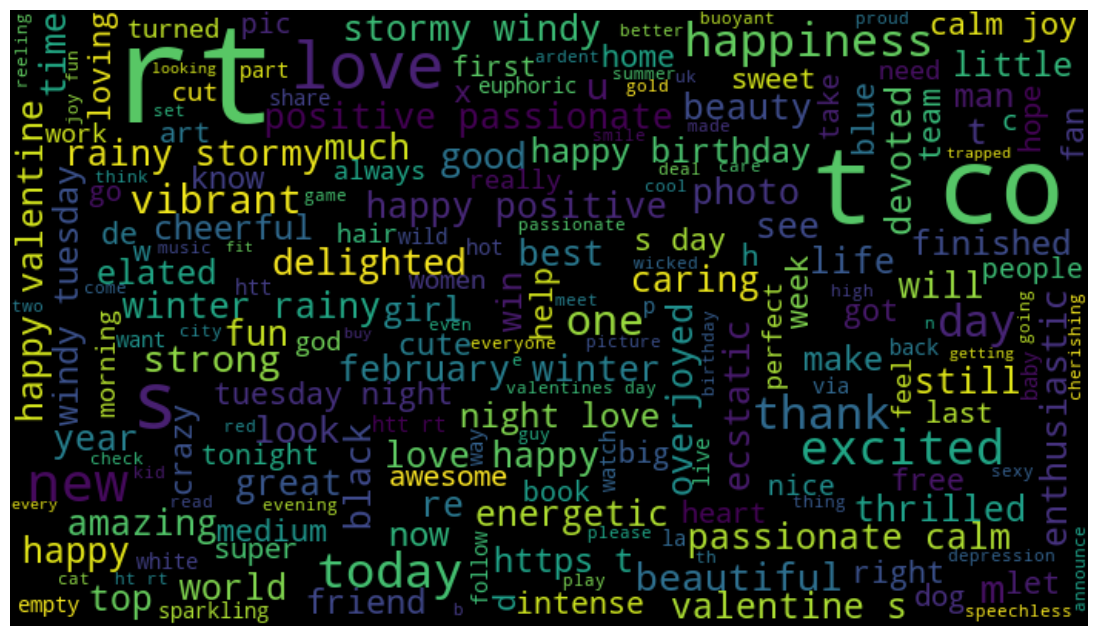

In [11]:
# visualize the frequent positive words
all_words = " ".join([sentence for sentence in df["Caption"][df['LABEL']=='positive']])

wordcloud = WordCloud(width=700, height=400, random_state=42, max_font_size=90).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# VADER Seniment Scoring

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [65]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [66]:
sia =SentimentIntensityAnalyzer()
sia.polarity_scores('workout fitness at shades of hot motivation attitude strong focused fitne')

{'neg': 0.0, 'neu': 0.402, 'pos': 0.598, 'compound': 0.8555}

In [67]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Caption']
    myid = row['File Name']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/4869 [00:00<?, ?it/s]

def sentiment_analyser(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = []
    for caption in text:
        score = analyzer.polarity_scores(caption)
        scores.append(score)
    return scores

all_score = []
sentiment_score = sentiment_analyser(df['Caption'])
for score in sentiment_score:
    all_score.append(score)

In [68]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1.txt,0.348,0.652,0.000,-0.4939
10.txt,0.341,0.659,0.000,-0.7351
100.txt,0.000,0.669,0.331,0.8555
1000.txt,0.225,0.775,0.000,-0.4939
1001.txt,0.000,0.488,0.512,0.6369
...,...,...,...,...
995.txt,0.260,0.569,0.171,-0.2732
996.txt,0.000,0.403,0.597,0.8126
997.txt,0.412,0.588,0.000,-0.4215
998.txt,0.000,1.000,0.000,0.0000


In [69]:
vaders = vaders.reset_index().rename(columns={'index': 'File Name'})
vaders = vaders.merge(df, how='left')

In [70]:
vaders.head(10)

,File Name,neg,neu,pos,compound,Caption,LABEL
0,1.txt,0.348,0.652,0.000,-0.4939,how i feel today legday jelly aching gym,negative
1,10.txt,0.341,0.659,0.000,-0.7351,arrivatw absolute disgrace two carriages from...,negative
2,100.txt,0.000,0.669,0.331,0.8555,this is my valentine s from of my nephews i am...,positive
3,1000.txt,0.225,0.775,0.000,-0.4939,betterfeelingfilms rt via instagram first day ...,neutral
4,1001.txt,0.000,0.488,0.512,0.6369,zoe s first love rattled johnnyharper,positive
5,1002.txt,0.269,0.378,0.353,0.4588,chaotic love giclee print at art love chaotic ...,positive
6,1003.txt,0.374,0.584,0.043,-0.8591,they gna be mad when i reach that goal though ...,negative
7,1004.txt,0.204,0.701,0.096,-0.4019,on day it s now in my daily routine feeling gu...,negative
8,1005.txt,0.364,0.435,0.201,-0.4588,animalabuse toronto puppy torture we offer k ...,neutral
9,1006.txt,0.379,0.621,0.000,-0.6688,mike will not accept this plastic rose wfaamik...,negative


# Plot VADER results

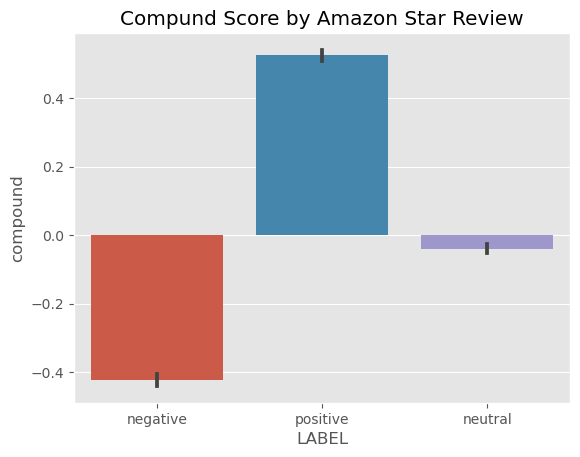

In [15]:
ax = sns.barplot(data=vaders, x='LABEL', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

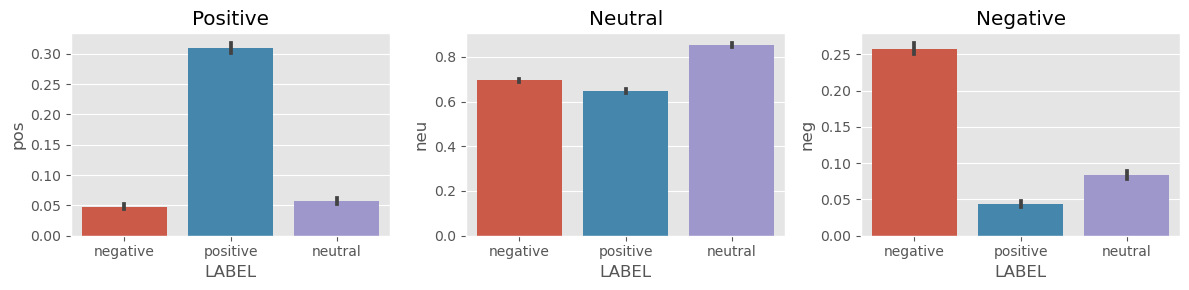

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='LABEL', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='LABEL', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='LABEL', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_words = tokenized_words.apply(lambda sentence:[stemmer.stem(word)for word in sentence])
tokenized_words.head()

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(df['Caption'])
y = df['LABEL']

In [17]:
len(cv.get_feature_names())

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1000

In [90]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.25)

In [81]:
rf_clf = RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=7, n_estimators=190, random_state=15, bootstrap= True,oob_score=True)    
rf_clf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=7, n_estimators=190, oob_score=True,
                       random_state=15)

In [82]:
print(rf_clf.score(xtrain,ytrain))
print(rf_clf.score(xtest,ytest))

0.55573815393043
0.5402298850574713


In [84]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [87]:
gnb_model = MultinomialNB()
gnb_model.fit(xtrain,ytrain)

MultinomialNB()

In [88]:
# testing
print(gnb_model.score(xtrain,ytrain))
print(gnb_model.score(xtest,ytest))

0.9567241851547521
0.6650246305418719


In [103]:
param_grid = {
    'alpha': np.logspace(-3, 4, 7),  # Range of alpha values to try
}
param_grid

{'alpha': array([1.00000000e-03, 1.46779927e-02, 2.15443469e-01, 3.16227766e+00,
        4.64158883e+01, 6.81292069e+02, 1.00000000e+04])}

In [104]:
grid_search = GridSearchCV(gnb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': array([1.00000000e-03, 1.46779927e-02, 2.15443469e-01, 3.16227766e+00,
       4.64158883e+01, 6.81292069e+02, 1.00000000e+04])},
             scoring='accuracy')

In [105]:
best_alpha = grid_search.best_params_['alpha']
best_alpha

3.1622776601683795

In [106]:
final_model = MultinomialNB(alpha=best_alpha)
final_model.fit(xtrain, ytrain)

MultinomialNB(alpha=3.1622776601683795)

In [107]:
from sklearn.metrics import accuracy_score
y_pred = final_model.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6527


In [108]:
y_pred = final_model.predict(xtrain)
accuracy = accuracy_score(ytrain, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9008
